# Simulation of data relating to weather at Dublin Airport
* [Introduction](#Introduction)
* [What is the dataset?](#What-is-the-dataset?)
* [Setup](#Setup)
* [Examination of the dataset](#Examination-of-the-dataset)
 * [Description of dataset](#Description-of-dataset)
 * [Skewness and kurtosis of dataset](#Skewness-and-kurtosis-of-dataset)
 * [Correlation](#Correlation)
 * [Plotting statistics](#Plotting-statistics)
 * [Discussion of the dataset](#Discussion-of-the-dataset)
* [Simulation of new data](#Simulation-of-new-data)
* [Further Analysis](#Further-Analysis)
* [Bibliography](#Bibliography)

## Introduction
This notebook is intended to fulfil two tasks, namely, to review a data set; and to simulate data to resemble the dataset chosen. In order to do these tasks, the project (and notebook) will be broken into 2 sections. In the first section, a review of the dataset chosen, in this case, the weather at Dublin Airport, will be conducted. This review will include a statistical review of the data, as well as discussion of what the statistics mean. The second section will be an attempt to simulate like data, based on the information gleaned in the first section.

Throughout the notebook, there will be code used. These snippets of code will be used to cleanse the data, provide the statistical analysis, and ultimately attempt to simulate the data. It should be noted that some of the data generated will be random, and therefore the values of the generated data will change, in a [pseudorandom](https://www.random.org/randomness/) manner.
## What is the dataset?
The dataset that was chosen is the Dublin Airport Weather records from the 1st January, 2016 to the 31st December, 2018. This data was sourced from the [Government of Ireland data website]( https://data.gov.ie/dataset/dublin-airport-hourly-weather-station-data/resource/bbb2cb83-5982-48ca-9da1-95280f5a4c0d?inner_span=True). The dataset from the source is made up of record readings of various weather attributes recorded every hour from the 1st January, 1989 to the 31st December, 2018. Each row in the dataset is made up of the following columns:

* __**Rain**__: the amount of precipitation to have fallen within the last hour. Measured in millimetres (mm).
* __**Temp**__: the air temperature at the point of record. Measured in degrees Celsius (°C).
* __**Wetb**__: the wet bulb temperature at the point of record. Measured in degrees Celsius (°C).
* __**Dewpt**__: dew point air temperature at the point of record. Measured in degrees Celsius (°C).
* __**Vappr**__: the vapour pressure of the air at the point of record. Measured in hectopascals (hpa).
* __**Rhum**__: the relative humidity for the given air temperature. Measured in percent (%).
* __**Msl**__: mean sea level pressure. Measured in hectopascals (hpa).
* __**Wdsp**__: Mean hourly wind speed. Measured in knots (kt).
* __**Wddir**__: Predominant wind direction. Measured in knots (kt).
* __**Ww**__: Synop code for resent weather.
* __**W**__: Synop code for past weather.
* __**Sun**__: The duration of the sun for the last hour. Measured in hours (h).
* __**Vis**__: Visibility, or air clarity. Measured in metres (m).
* __**Clht**__: Cloud ceiling height. Measured in hundreds of feet (100 ft).
* __**Clamt**__: Amount of cloud. Measured using okta.

There are also a number of indicators for some of the data recorded. Given the timespan of the data (30 years), the number of record points for each row (up to 21 points), and the hourly record taking, the data set is very large, comprising of nearly 11,000 days, more than 262,000 rows, and 6,300,000 data points.

The retrieved dataset is too large for the proposed simulation. It is therefore intended reduce it in size. This has been done by limiting the data to the period of the month of December, and the years of 2016 to 2018 inclusive. The number of record points has been reduced to rain, temperature, relative humidity, sun, and visibility. Additionally, the rows of data have been reduced by amalgamating the hourly records into days. The rainfall levels, and hours of sunshine have been added together to provide a total sum for each day. The temperature, relative humidity, and visibility have been averaged for the day in question. This has reduced the number of dataset to 93 (31 x 3) rows, and 6 columns. 

Both the original and new datasets are available in this repository.

## Why was this dataset chosen?

The dataset was chosen for a number of reasons. Primarily, it was chosen as it provides a large volume of data, with interrelated variables. Some of these variables may be positively, or negatively, correlated to each other. This would stand to reason, as the number of hours of sunshine, and the millimetres of rain that have fallen would normally be negatively correlated. Secondly, the dataset is related to the weather in Ireland, or at least Dublin. As the weather .is a favourite topic of conversation, the dataset seemed appropriate.

## Setup
Before the analysis of the dataset can begin, it is necessary to import both the libraries to be used. 
* **Numpy**: To run some of the functions for analysis, as well as the generate some of the simulated data.
* **Pandas**: The data set will be held in various pandas dataframes, which will allow for some statistical analysis to be conducted.
* **Seaborn**: Wil be used for various plotting functionality.
* **Matplotlib.pyplot**: Will be used for various plotting functionality
After this, the data can be imported in a dataframe. This will allow the determination of various statistics with regards to the dataset, as well as providing a basis for the simulation to be run. 

The script below will import the data, and set it up in a dataframe.


In [29]:
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

# Source for the data set
url = "https://raw.githubusercontent.com/Clauric/PfDA_Sim_Project/master/Dublin%20Airport%20Weather%202016%20-%202018%20cummulative.csv"

# Create a data frame containing the data set
# Set the values in the first column to dates
Dublin_df = pd.read_csv(url, parse_dates=[0])

# Rename the columns to be easier to read
Dublin_df.columns = ["Date", "Rain (mm)", "Temp. (°C)", "Rel. Hum. (%)", "Sun (hrs)", "Visibility (m)"]

## Examination of the dataset
The data set is expected to have the following attributes:
* All columns (except *Date*) to be made up of numbers, either floating or integers.
* Date column to be a datetime value.
* Only the temperature (*Temp*) column can have a value below zero.
* All non-date columns can have an unlimited upper value (except relative humidity (*Rel. Hum.*), which is limited to 100%).

Additionally, the dataframe should consist of 93 (31 days per month x 3 months) rows, 6 columns, and 1 row of headers.

Looking at the dataframe shapes, type and the first 10 rows, we get the following:

In [30]:
# Shape, data types and first 10 rows of data set

# Shape
print("Shape of dataframe")
row, column = Dublin_df.shape
print("Rows:", row)
print("Columns:", column)
print()

# Types of values
print("Data types in dataframe")
print(Dublin_df.dtypes)
print()

# First 10 rows
print("First 10 rows of dataframe")
print(Dublin_df.head(10))

Shape of dataframe
Rows: 93
Columns: 6

Data types in dataframe
Date              datetime64[ns]
Rain (mm)                float64
Temp. (°C)               float64
Rel. Hum. (%)            float64
Sun (hrs)                float64
Visibility (m)             int64
dtype: object

First 10 rows of dataframe
        Date  Rain (mm)  Temp. (°C)  Rel. Hum. (%)  Sun (hrs)  Visibility (m)
0 2016-01-12        0.0        1.38          94.67        6.9            8979
1 2016-02-12        0.0        3.29          90.79        0.1           14100
2 2016-03-12        0.2        6.60          77.42        0.1           30000
3 2016-04-12        0.0        4.84          76.50        0.5           30417
4 2016-05-12        0.0        5.00          86.58        0.0           20167
5 2016-06-12        0.5       10.55          91.71        0.0           11658
6 2016-07-12        0.1       13.81          85.75        0.1           24042
7 2016-08-12        3.4       10.10          90.83        5.6           

From the above, we can see that the shape of the data is as expected (i.e. 93 rows, 6 columns). The first 10 rows show that the column headers are as expected. While not really an issue, it should be noted that the relative humidity is given as values above 1, even though it is a percentage value. However, for the sake of this analysis, it will be left as is, instead of converting to a value between 0 and 1.

### Description of dataset
In order to be able to work with the dataset, and draw any conclusions from the data, it is important to determine some of the dataset’s properties. In order to do this, we will extract basic measures, more commonly known as descriptive statistics. These statistics can then be used as a guide to both further analysis, as well as determine which pseudorandom number generator is most appropriate to use (if possible).

The initial set of descriptive statistics are the mean, mode, and median of the data, as well as standard deviation, quartiles, and min and max values. Luckily, pandas has the ability to provide the values for most of these statistics, using the describe function. However, while this is useful, it is also necessary to understand what the terms provided by the describe function actually mean.

* **Mean**: Also known as the simple average, is the sum of all the values divided by the number of values being summed.
* **Standard deviation**: A measure of how are a number is from the mean. In a perfectly normal distribution, ~68% of all values would be within 1 standard deviation of the mean. Represented in the describe output as *std*.
* **min**: The lowest value within the dataset.
* **25%**: The value for the 25th percentile. In other words, 25% of all the values in the dataset are below this value.
* **50%**: The value for the 50% percentile. In other words, 50% of all the values in the dataset are below this value. This value is often called the *median value*.
* **75%**: The value for the 75th percentile. In other words, 75% of all the values in the dataset are below this value.
* **Max**: The largest value in the dataset.

The values for the current dataset are:

In [31]:
# Describe function for the weather dataset
print("Descriptions of the weather dataset")
print()
print(Dublin_df.describe())

Descriptions of the weather dataset

       Rain (mm)  Temp. (°C)  Rel. Hum. (%)  Sun (hrs)  Visibility (m)
count  93.000000   93.000000      93.000000  93.000000       93.000000
mean    2.040860    6.809892      87.153118   1.615054    22480.709677
std     3.562768    2.975827       5.529958   2.053996     6384.259399
min     0.000000   -0.520000      73.790000   0.000000     8979.000000
25%     0.000000    4.850000      83.170000   0.100000    18792.000000
50%     0.200000    6.850000      88.040000   0.500000    22417.000000
75%     2.500000    9.020000      90.790000   2.700000    27375.000000
max    15.500000   13.810000      97.580000   6.900000    36667.000000


As we can see, certain measures from the descriptive statistics such as correlation, skewness, and kurtosis are missing from the describe functionality. These statistics also give rise to important information regarding the dataset. These will need to be gather to provide a full picture of the dataset.

### Skewness and kurtosis of dataset
The skewness and kurtosis are interrelated terms that are used to describe the nature of the distribution of the dataset, and how it differs from a normally distributed dataset. The definition of these terms are:
•	Skewness: the direction and amount of asymmetry of the dataset about its mean. If the absolute value of the skewness is:
> - greater than 1, the data is highly skewed and the distribution is very asymmetric.
> - greater than 1, the data is highly skewed and the distribution is very asymmetric.
> - greater than 0.5 and less than 1, the data is moderately skewed, and the distribution is somewhat asymmetric.
> - greater than 0, and less than 0.5, the distribution of the data is approximately symmetric.
> - equal to 0, the data is normally distributed, and symmetric.

The sign of the skewness (i.e. positive or negative) also determines the skewness. Negative skewness indicates that the distribution is skewed to the left, the mean being less than the median, which is less than the mode. Positive values of skewness indicate the opposite, with the distribution being skewed to the right, and the mode being less than the median, which is less than the mean.

* Kurtosis: the kurtosis of a dataset indicates the sharpness, or flatness, of the peak of the data (around the mode, or mean, depending on the skewness).

The kurtosis is measure against the normal distribution, which has a kurtosis of 0. If the kurtosis is negative, then distribution of the data has a smaller standard deviation, as more values are grouped near the mean. This gives the distribution a sharper, and higher peak, and narrower body. A positive kurtosis indicates that there is less grouping around the mean, and indicating that the distribution has a larger standard deviation. This also gives the distribution a flatter, and lower peak, and a wider body.

In pandas, the skewness and kurtosis of a dataset can be ascertained using the *skew* and *kurt* functions. These functions return values for each numeric column within the data set.


In [35]:
# Skewness and kurtosis of the dataset

print("Skewness")
print(Dublin_df.skew())

print()
print("Kurtosis")
print(Dublin_df.kurt())

Skewness
Rain (mm)         2.373325
Temp. (°C)       -0.286573
Rel. Hum. (%)    -0.289834
Sun (hrs)         1.103147
Visibility (m)   -0.303844
dtype: float64

Kurtosis
Rain (mm)         5.245557
Temp. (°C)       -0.232388
Rel. Hum. (%)    -0.558651
Sun (hrs)        -0.166213
Visibility (m)   -0.512492
dtype: float64


### Correlation
Correlation is a statistic that can be used to measure how well two sets of data correspond to each other. [Weisstein (2019)](http://mathworld.wolfram.com/Correlation.html) defines correlation as "*the degree to which two or more quantities are linearly associated*." As such, a correlation coefficient can be calculated that shows the relationship between the two sets of variables, as well strength of the relationship.
    
In correlation analysis, positive values show that the two sets of data are positively correlated (i.e. as one value rises or falls, so does the other). Conversely, negative values indicate that the two data sets are negatively or inversely correlated (i.e. as one value rises, or falls, the other falls, or rises). A zero value indicates that there is no relationship between the two sets of data. The strength of the relationship is indicated be the actual value of the correlation coefficient. An absolute value above 0.5 is considered a strong correlation, and above 0.75 is a very strong correlation. A value of -1 or 1 means that the two sets of data are perfectly correlated (i.e. either perfectly positive or perfectly negative correlation).
    
In pandas dataframes, the *corr* function can be used to ascertain the correlation between numeric sets of data.


Correlation coefficient for the weather dataset

                Rain (mm) Temp. (°C) Rel. Hum. (%) Sun (hrs) Visibility (m)
Rain (mm)                  0.0227972      0.186838 -0.183554      -0.363577
Temp. (°C)      0.0227972                0.0121619 -0.432843      -0.272923
Rel. Hum. (%)    0.186838  0.0121619                 -0.1475      -0.610795
Sun (hrs)       -0.183554  -0.432843       -0.1475                 0.280341
Visibility (m)  -0.363577  -0.272923     -0.610795  0.280341               



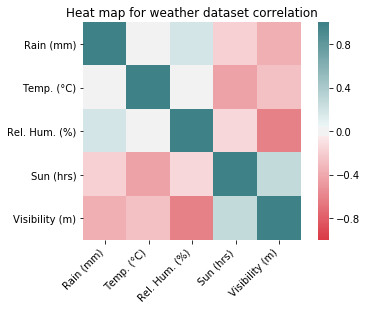

In [56]:
# Correlation analysis fot the weather dataset
print()
print("Correlation coefficient for the weather dataset")
print()

# Create new dataframe for the correlation coefficient values
corr_df = Dublin_df.corr(method="pearson")

# Create separate correlation dataframe for heatmap
corr_df_p = corr_df

# As each column will be perfectly correlated with itself, there is no need to show these values
# Replace the values of 1 with a blank value
corr_df = corr_df.replace({1.00000: ""})

# Print the new dataframe to show the correlation coefficients of the weather dataset
print(corr_df)
print()

# Create heatmap of correlations
ax = sns.heatmap(corr_df_p, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 200, n=500), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Heat map for weather dataset correlation")
plt.show()

The heatmap and the correlation table, when combined, aloow, at quick glance, to see how the values are correlated against each other.